In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from scipy import spatial

import astropy
from astropy import cosmology
import Corrfunc

import sys
sys.path.insert(0, '../code')
import read_lognormal

In [2]:
L = 6000
Nstr = '2e6'
z = 0
rlz = 0
# lengths in Mpc/h, vel in km/s
Lx, Ly, Lz, N_all, data_all = read_lognormal.read(f'../data/mocks/cat_L{L}_N{Nstr}_z{z}_patchy_lognormal_rlz{rlz}.bin')
print(data_all.shape)

(1999526, 6)


In [3]:
frac_subsample = 1.0
idx_subsample = np.random.randint(0, N_all, size=int(frac_subsample*N_all))
data = data_all[idx_subsample]
N = data.shape[0]
print(N)

1999526


In [4]:
pos = data[:,:3]
print(pos.shape)
start = time.time()
tree = scipy.spatial.cKDTree(pos)
end = time.time()
print(f'Time: {end-start:.4f} s')

(1999526, 3)
Time: 1.5685 s


In [5]:
# rmin, rmax = 20, 60
# bin_size = 10
# r_edges = np.arange(rmin, rmax+bin_size, bin_size)
# print(r_edges)
# r_pairs_total = np.empty(len(r_edges))

# for i, r in enumerate(r_edges):
#     start = time.time()
#     pairs = tree.query_pairs(r)
#     r_pairs_total[i] = len(pairs)
#     end = time.time()
#     print(f'Bin {r_edges[i]} time: {end-start:.3f} s')

In [6]:
# r_pairs_binned = r_pairs_total[1:] - r_pairs_total[:-1]
# r_avg = 0.5 * (r_edges[1:] + r_edges[:-1])

In [7]:
# plt.plot(figsize=(8,6))
# plt.plot(r_avg, r_pairs_binned)
# plt.xlabel('r (Mpc)')
# plt.ylabel('pair counts')

In [19]:
from Corrfunc.theory import DD
from Corrfunc.theory import xi

In [9]:
rmin, rmax = 20, 150
bin_size = 5
r_edges = np.arange(rmin, rmax+bin_size, bin_size)

autocorr = 1
nthreads = 1
x_data, y_data, z_data = pos.T

start = time.time()
res = DD(autocorr, nthreads, r_edges, x_data, y_data, z_data, periodic=False)
end = time.time()
print(f'Time: {end-start:.4f} s')

Time: 2.9004 s


In [11]:
r_avg = 0.5 * (r_edges[1:] + r_edges[:-1])

In [29]:
x_rand = np.random.uniform(0, Lx, size=N)
y_rand = np.random.uniform(0, Ly, size=N)
z_rand = np.random.uniform(0, Lz, size=N)

In [13]:
print(x_data.shape, x_rand.shape)
print(np.max(x_data), np.max(x_rand))

(1999526,) (1999526,)
5999.99609375 5999.99767342907


In [14]:
start = time.time()
res_rand = DD(autocorr, nthreads, r_edges, x_rand, y_rand, z_rand, periodic=False)
end = time.time()
print(f'Time: {end-start:.4f} s')

Time: 3.0107 s


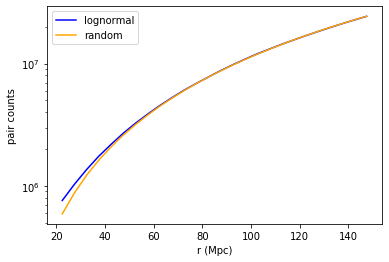

In [18]:
x_rand = np.random.uniform(size=N)
plt.plot(figsize=(8,6))
plt.plot(r_avg, res['npairs'], label='lognormal', color='blue')
plt.plot(r_avg, res_rand['npairs'], label='random', color='orange')
plt.xlabel('r (Mpc/h)')
plt.ylabel('pair counts')

#plt.xscale('log')
plt.yscale('log')

plt.legend()

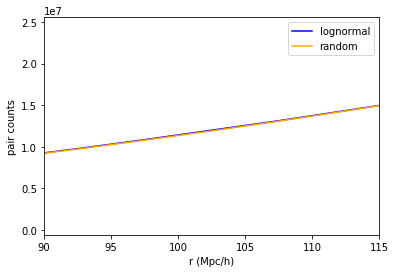

In [36]:
x_rand = np.random.uniform(size=N)
plt.plot(figsize=(8,6))
plt.plot(r_avg, res['npairs'], label='lognormal', color='blue')
plt.plot(r_avg, res_rand['npairs'], label='random', color='orange')
plt.xlabel('r (Mpc/h)')
plt.ylabel('pair counts')

#plt.xscale('log')
plt.xlim(90, 115)
#plt.ylim(90, 115)

#plt.yscale('log')

plt.legend()

In [20]:
res_xi = xi(Lx, nthreads, r_edges, x_data, y_data, z_data)

In [31]:
res_xi_rand = xi(Lx, nthreads, r_edges, x_rand, y_rand, z_rand)

In [32]:
print(x_data.shape, x_rand.shape)
print(np.max(x_data), np.max(x_rand))

(1999526,) (1999526,)
5999.99609375 5999.992969401932


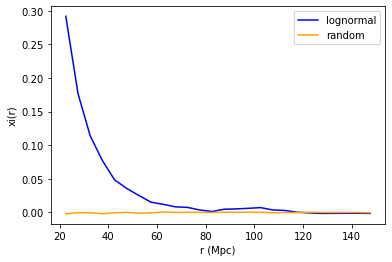

In [33]:
plt.plot(figsize=(8,6))
plt.plot(r_avg, res_xi['xi'], label='lognormal', color='blue')
plt.plot(r_avg, res_xi_rand['xi'], label='random', color='orange')
plt.xlabel('r (Mpc)')
plt.ylabel('xi(r)')

#plt.xscale('log')
#plt.yscale('log')

plt.legend()